In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import sklearn
import math
import csv
import os
import torch.nn as nn
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from pandas.api.types import is_float_dtype
from sklearn.datasets import load_boston
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.svm import SVC
import graphviz
import sklearn.datasets
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.optimize import leastsq
from scipy import sparse
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn import preprocessing
import seaborn as sns

In [2]:
covid = pd.read_csv('covid.csv')

In [3]:
data = covid[covid.columns[41:59]] #选取三天中其中一天的一组数据，不包括地点

In [4]:
data

,cli,ili,hh_cmnty_cli,nohh_cmnty_cli,wearing_mask,travel_outside_state,work_outside_home,shop,restaurant,spent_time,large_event,public_transit,anxious,depressed,felt_isolated,worried_become_ill,worried_finances,tested_positive
0,0.814610,0.771356,25.648907,21.242063,84.644672,13.462475,36.519841,63.139094,23.835119,44.726055,16.946929,1.716262,15.494193,12.043275,17.000647,53.439316,43.279629,19.586492
1,0.838995,0.807767,25.679101,21.280270,84.005294,13.467716,36.637887,63.318650,23.688882,44.385166,16.463551,1.664819,15.299228,12.051505,16.552264,53.256795,43.622728,20.151838
2,0.897802,0.887893,26.060544,21.503832,84.438618,13.038611,36.429119,62.434539,23.812411,43.430423,16.151527,1.602635,15.409449,12.088688,16.702086,53.991549,43.604229,20.704935
3,0.972842,0.965496,25.754087,21.016210,84.133873,12.581952,36.416557,62.024517,23.682974,43.196313,16.123386,1.641863,15.230063,11.809047,16.506973,54.185521,42.665766,21.292911
4,0.955306,0.963079,25.947015,20.941798,83.995931,12.938675,37.014578,62.116842,23.593983,43.362200,16.159971,1.677523,15.717207,12.355918,16.273294,53.637069,42.972417,21.166656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,0.655823,0.659976,25.265366,20.468897,91.011756,6.801897,32.727184,50.265694,15.188547,31.597793,8.013637,1.768811,14.699027,11.227049,18.814486,68.115748,38.478143,13.869286
2696,0.598352,0.602552,25.299465,20.756444,90.682057,7.152368,33.638563,50.050349,15.462823,31.656358,8.239559,1.789015,14.808636,11.371546,19.257324,67.691795,38.953184,13.434180
2697,0.586713,0.597559,25.271178,20.770195,90.866100,6.857209,33.959012,50.024971,15.090116,30.839219,7.849525,1.760094,14.617563,11.163213,18.742673,68.024690,38.920206,13.008853
2698,0.576435,0.595312,24.607461,20.176201,90.846126,6.851475,33.932384,49.885129,14.779264,30.617100,7.754800,1.780730,14.513419,11.281241,18.539741,67.855755,39.224244,12.725638


# 频数分布图

In [5]:
col_list = ["cli","ili",
            "hh_cmnty_cli",
            "nohh_cmnty_cli",
            "wearing_mask",
            "travel_outside_state",
            "work_outside_home",
            "shop",
            "restaurant",
            "spent_time",
            "large_event",
            "public_transit",
            "anxious",
            "depressed",
            "felt_isolated",
            "worried_become_ill",
            "worried_finances",
            "tested_positive"]
test_list = ["cli","ili",
            "hh_cmnty_cli",
            "nohh_cmnty_cli",
            "wearing_mask",
            "travel_outside_state",
            "work_outside_home",
            "shop",
            "restaurant",
            "spent_time",
            "large_event",
            "public_transit",
            "anxious",
            "depressed",
            "felt_isolated",
            "worried_become_ill",
            "worried_finances"]

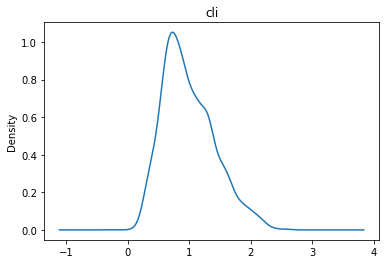

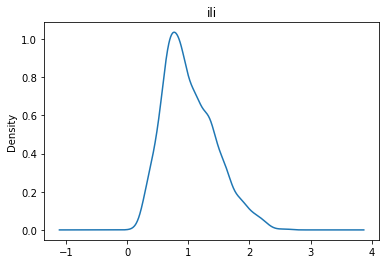

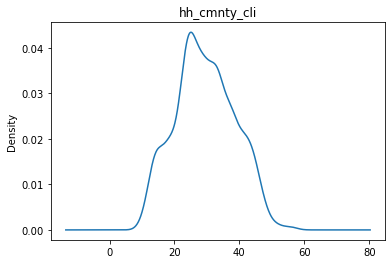

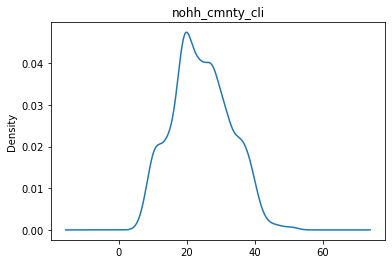

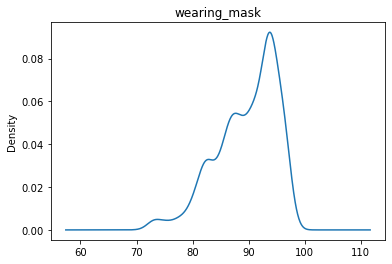

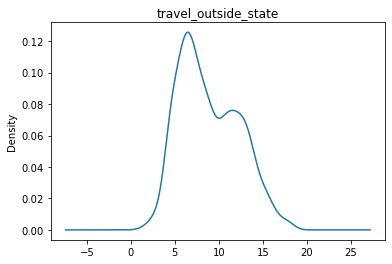

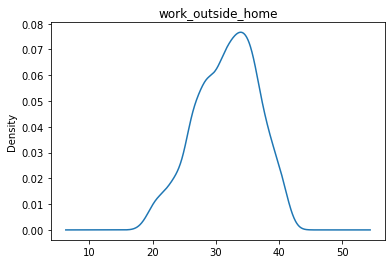

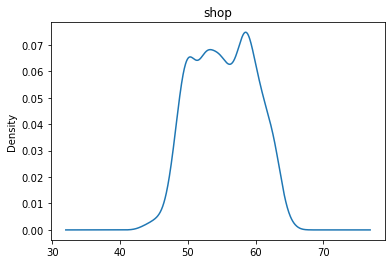

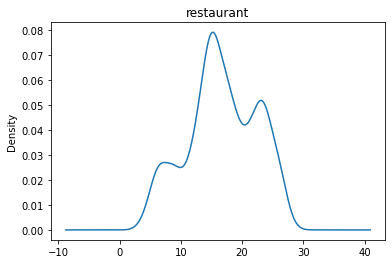

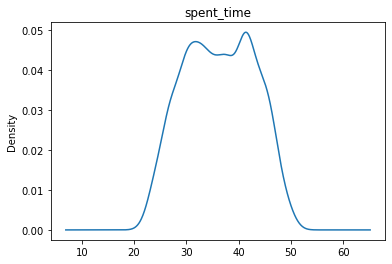

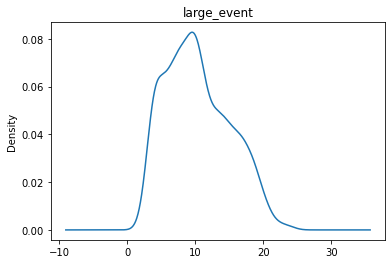

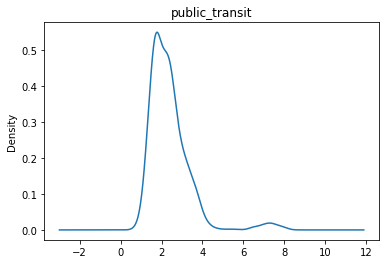

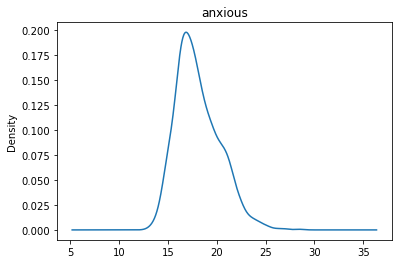

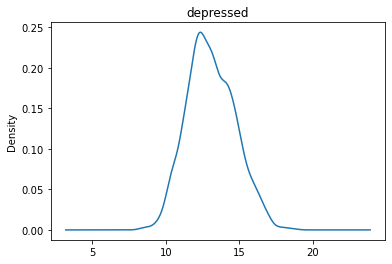

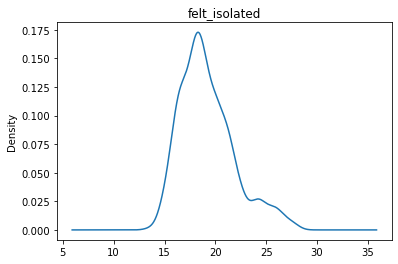

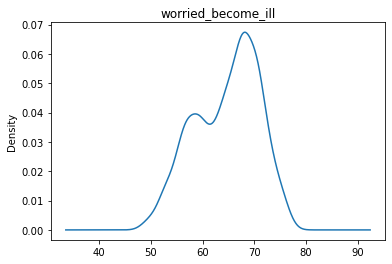

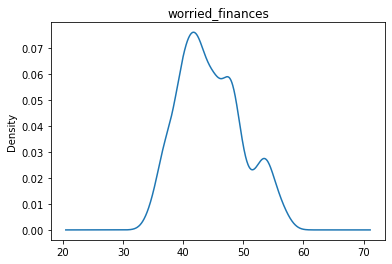

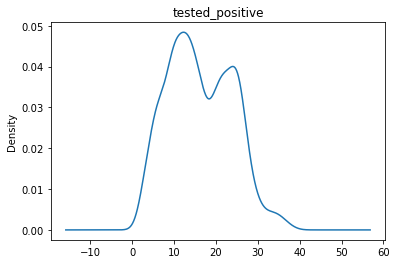

In [6]:
for i in col_list:
    ax = data[i].plot(kind='kde')
    ax.set_title(i)
    plt.show()

In [7]:
missing_data = data.isna().sum()
print("缺失值计数：\n%s" % missing_data)

缺失值计数：
cli                     3
ili                     3
hh_cmnty_cli            3
nohh_cmnty_cli          1
wearing_mask            2
travel_outside_state    1
work_outside_home       3
shop                    1
restaurant              1
spent_time              3
large_event             1
public_transit          2
anxious                 3
depressed               6
felt_isolated           0
worried_become_ill      4
worried_finances        0
tested_positive         5
dtype: int64


In [8]:
#缺失值填补
for i in missing_data.index:
    if missing_data[i] > 0:
        try:
            data[i] = data[i].astype("float64")  
            data[i] = data[i].fillna(data[i].median())  
        except:
            if is_float_dtype(data[i]):
                data[i] = data[i].fillna(data[i].mean())  
            else:
                data[i] = data[i].fillna(data[i].mode()[0])  
print("缺失值计数：\n%s" %  data.isna().sum())

缺失值计数：
cli                     0
ili                     0
hh_cmnty_cli            0
nohh_cmnty_cli          0
wearing_mask            0
travel_outside_state    0
work_outside_home       0
shop                    0
restaurant              0
spent_time              0
large_event             0
public_transit          0
anxious                 0
depressed               0
felt_isolated           0
worried_become_ill      0
worried_finances        0
tested_positive         0
dtype: int64


<ipython-input-8-3c75a03695b4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = data[i].astype("float64")
<ipython-input-8-3c75a03695b4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = data[i].fillna(data[i].median())


In [9]:
#箱线图
def BOX_fenxi(x,y):
    plt.figure()
    plt.boxplot(x,whis = y)
    Q1 = x.quantile(q = 0.25)
    Q3 = x.quantile(q = 0.75)
    low_whisker = Q1 - y*(Q3-Q1)
    up_whisker = Q3 + y*(Q3-Q1)
    print(x[(x>up_whisker)|(x<low_whisker)], flush=True)

Series([], Name: cli, dtype: float64)
Series([], Name: ili, dtype: float64)
Series([], Name: hh_cmnty_cli, dtype: float64)
Series([], Name: nohh_cmnty_cli, dtype: float64)
Series([], Name: wearing_mask, dtype: float64)
Series([], Name: travel_outside_state, dtype: float64)
Series([], Name: work_outside_home, dtype: float64)
Series([], Name: shop, dtype: float64)
Series([], Name: restaurant, dtype: float64)
Series([], Name: spent_time, dtype: float64)
Series([], Name: large_event, dtype: float64)
75      5.835381
1748    7.652166
1749    7.594695
1750    7.805343
1751    7.777693
          ...   
1811    7.220159
1812    7.419756
1813    7.294803
1814    7.391681
1815    7.541829
Name: public_transit, Length: 69, dtype: float64
Series([], Name: anxious, dtype: float64)
Series([], Name: depressed, dtype: float64)
Series([], Name: felt_isolated, dtype: float64)
Series([], Name: worried_become_ill, dtype: float64)
Series([], Name: worried_finances, dtype: float64)
Series([], Name: tested_p

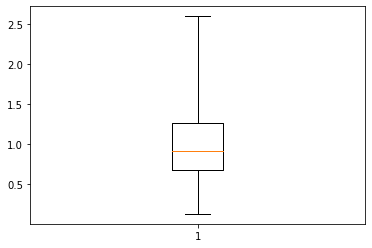

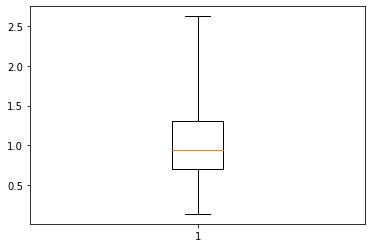

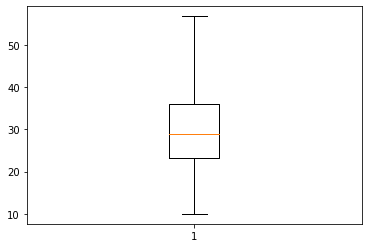

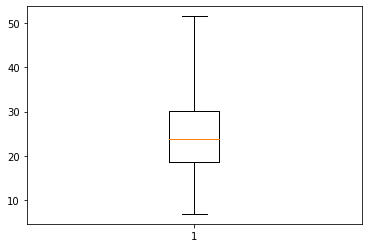

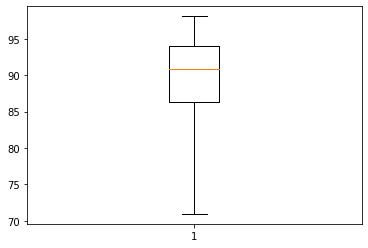

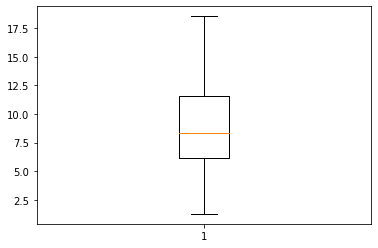

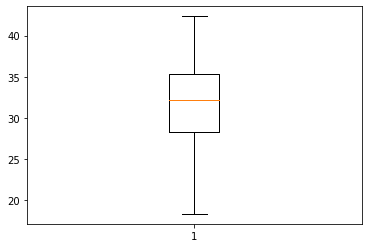

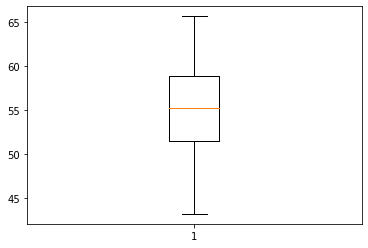

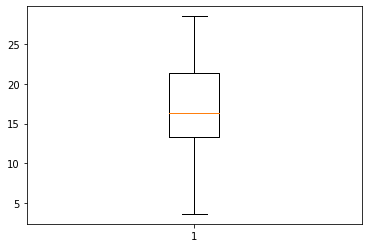

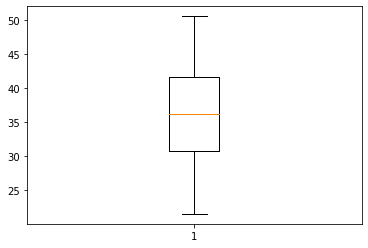

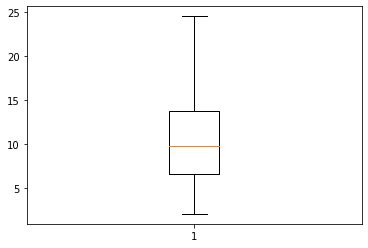

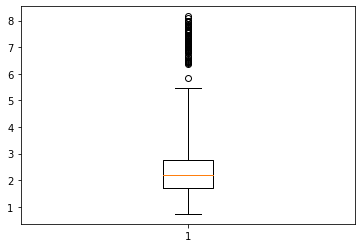

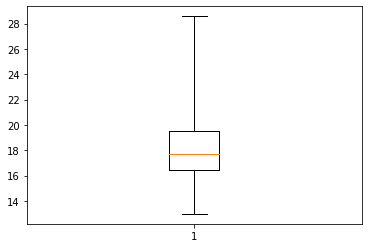

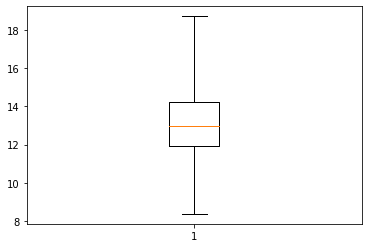

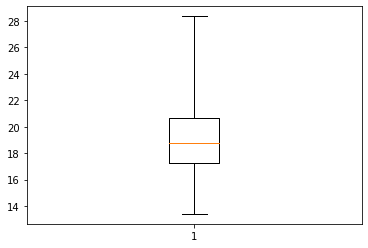

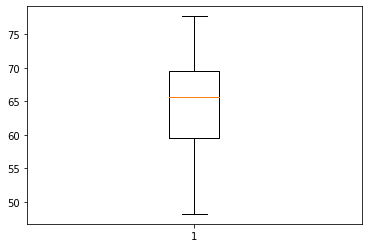

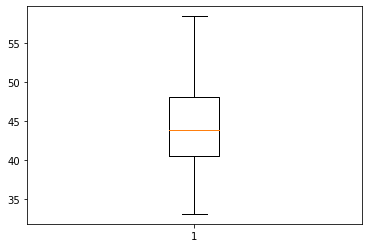

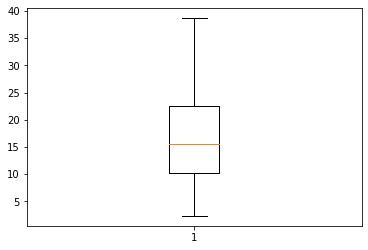

In [10]:
for i in col_list:
    BOX_fenxi(data[i],3)

In [11]:
#从箱线图中可以看出 public transit离群值较多

In [12]:
# 离群值处理
def replace_limit_liqun(x,y,z,p,q):
    plt.figure()
    Q1 = x[y].quantile(q = 0.25)
    Q3 = x[y].quantile(q = 0.75)
    low_whisker = Q1 - z*(Q3-Q1)
    up_whisker = Q3 + z*(Q3-Q1)
    x.loc[x[y]>up_whisker] = up_whisker
    x.loc[x[y]<low_whisker] = low_whisker
    plt.boxplot(p[y],whis = z)

75      5.835381
1748    7.652166
1749    7.594695
1750    7.805343
1751    7.777693
          ...   
1811    7.220159
1812    7.419756
1813    7.294803
1814    7.391681
1815    7.541829
Name: public_transit, Length: 69, dtype: float64


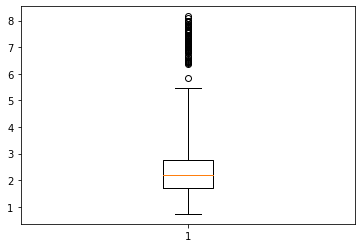

In [13]:
BOX_fenxi(data["public_transit"],3)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

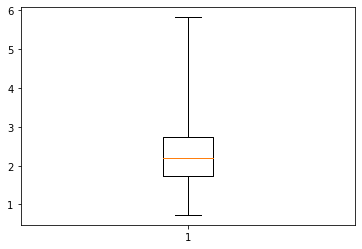

In [14]:
replace_limit_liqun(data,'public_transit',3,data,0)

In [15]:
#处理之后

In [16]:
#无定量变量的数据转换

In [17]:
#偏度系数
def piandu(x,y):
    pian = x[y].skew()
    print(f"{y}的偏度系数为：{pian}")
    
for i in col_list:
    piandu(data,i)

cli的偏度系数为：4.024010982431733
ili的偏度系数为：3.984071566774816
hh_cmnty_cli的偏度系数为：-0.09286899887597988
nohh_cmnty_cli的偏度系数为：0.08354972683132011
wearing_mask的偏度系数为：-4.805602557218567
travel_outside_state的偏度系数为：0.4274767080620351
work_outside_home的偏度系数为：-1.6015707494907716
shop的偏度系数为：-3.847512747663012
restaurant的偏度系数为：-0.2148933341698344
spent_time的偏度系数为：-1.1206121201611354
large_event的偏度系数为：0.44066610871037576
public_transit的偏度系数为：1.620963288689007
anxious的偏度系数为：-1.1909457778128834
depressed的偏度系数为：-0.8956374778768972
felt_isolated的偏度系数为：-0.802777110706943
worried_become_ill的偏度系数为：-3.435465546478572
worried_finances的偏度系数为：-2.3660345608724045
tested_positive的偏度系数为：0.2353855806610667


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


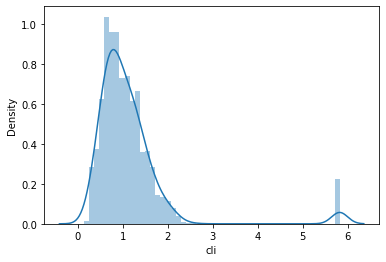

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


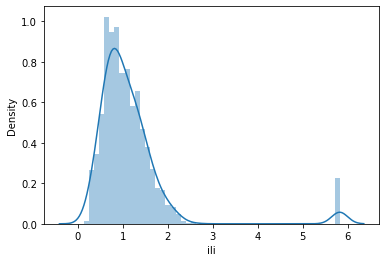

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


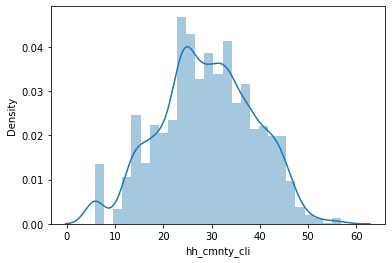

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


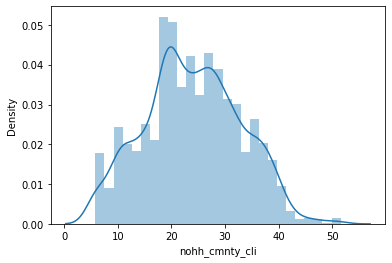

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


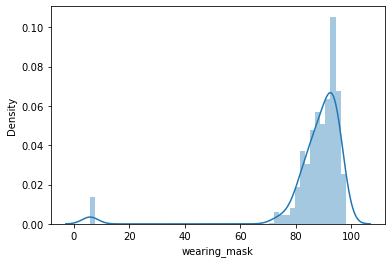

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


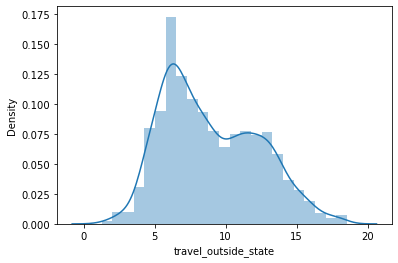

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


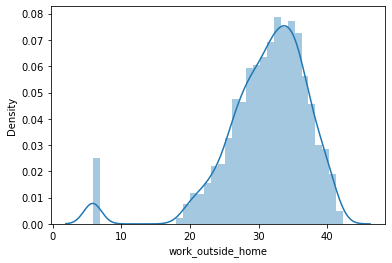

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


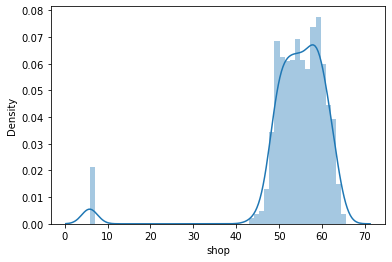

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


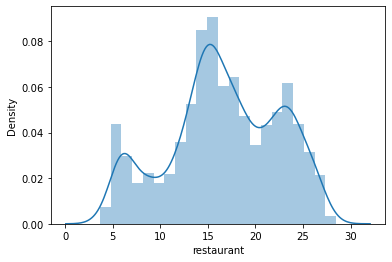

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


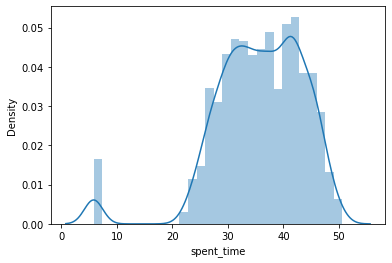

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


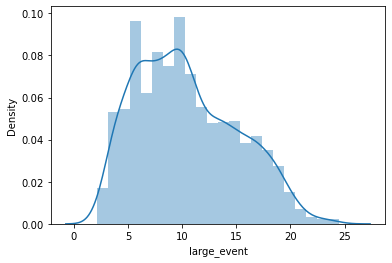

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


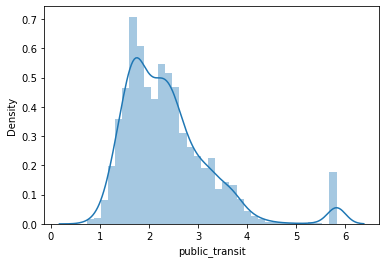

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


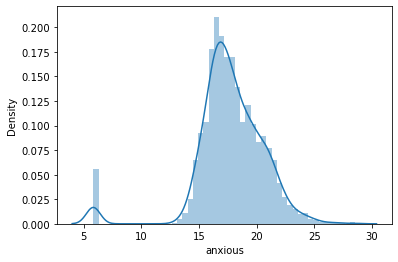

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


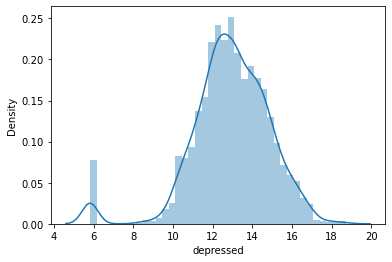

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


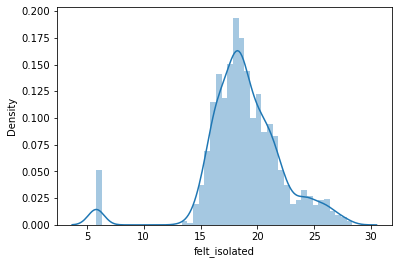

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


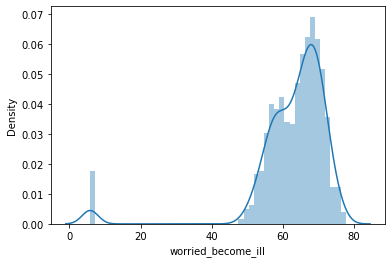

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


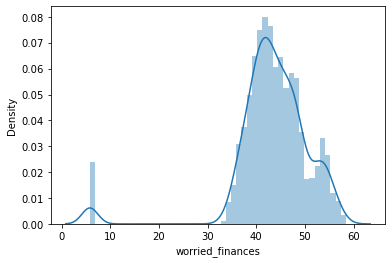

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


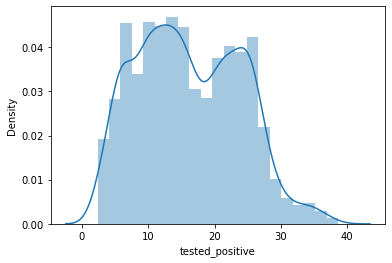

In [19]:
for i in col_list:
    sns.distplot(data[i])
    plt.show()
    


# 上图看出虽然wearing_mask和shop明显右偏，但是因为是符合数据背景所在情景的，因此不需要进一步处理

In [21]:
#标准差系数
rank_std = {}
def std_xishu(x,y,z):
    o = x[y].std()/x[y].mean()
    print(f"{y}的标准差系数为{o}")
    z.update({y:o})

In [22]:
for i in test_list:
    std_xishu(x,i,rank_std)


cli的标准差系数为0.7742533633399612
ili的标准差系数为0.7564973333565667
hh_cmnty_cli的标准差系数为0.3390033225875926
nohh_cmnty_cli的标准差系数为0.37279972801348465
wearing_mask的标准差系数为0.1627104589812404
travel_outside_state的标准差系数为0.37785523360185225
work_outside_home的标准差系数为0.20338320533064716
shop的标准差系数为0.16639360762014035
restaurant的标准差系数为0.3486100968630327
spent_time的标准差系数为0.22689537401386692
large_event的标准差系数为0.44645038297396805
public_transit的标准差系数为0.3809736324995875
anxious的标准差系数为0.16679657457298966
depressed的标准差系数为0.15289813223718907
felt_isolated的标准差系数为0.18168717667120868
worried_become_ill的标准差系数为0.176039042473115
worried_finances的标准差系数为0.18456107165688163


In [23]:
sorted(rank_std.items(), key=lambda item:item[1],reverse = True)

[('cli', 0.7742533633399612),
 ('ili', 0.7564973333565667),
 ('large_event', 0.44645038297396805),
 ('public_transit', 0.3809736324995875),
 ('travel_outside_state', 0.37785523360185225),
 ('nohh_cmnty_cli', 0.37279972801348465),
 ('restaurant', 0.3486100968630327),
 ('hh_cmnty_cli', 0.3390033225875926),
 ('spent_time', 0.22689537401386692),
 ('work_outside_home', 0.20338320533064716),
 ('worried_finances', 0.18456107165688163),
 ('felt_isolated', 0.18168717667120868),
 ('worried_become_ill', 0.176039042473115),
 ('anxious', 0.16679657457298966),
 ('shop', 0.16639360762014035),
 ('wearing_mask', 0.1627104589812404),
 ('depressed', 0.15289813223718907)]

In [22]:
# 以上标准差系数从侧面证明了和covid病例确诊的直接相关的两个数据的标准差系数最大

In [32]:
#相关系数矩阵
data.corr()


,cli,ili,hh_cmnty_cli,nohh_cmnty_cli,wearing_mask,travel_outside_state,work_outside_home,shop,restaurant,spent_time,large_event,public_transit,anxious,depressed,felt_isolated,worried_become_ill,worried_finances,tested_positive
cli,1.000000,0.998925,0.062444,0.112814,-0.830604,-0.186749,-0.540884,-0.852569,-0.341609,-0.614154,-0.170298,0.379196,-0.472696,-0.476440,-0.502571,-0.668634,-0.490624,0.203856
ili,0.998925,1.000000,0.066068,0.116092,-0.828657,-0.192175,-0.539035,-0.849503,-0.341080,-0.612781,-0.170923,0.382345,-0.466893,-0.472686,-0.498284,-0.667210,-0.488500,0.204033
hh_cmnty_cli,0.062444,0.066068,1.000000,0.995278,0.345811,-0.020177,0.298107,0.109299,-0.118965,-0.002989,-0.066401,-0.658317,0.484437,0.356400,0.378743,0.501511,0.631581,0.877269
nohh_cmnty_cli,0.112814,0.116092,0.995278,1.000000,0.292237,-0.020741,0.279531,0.062574,-0.130204,-0.028490,-0.068940,-0.630291,0.460716,0.333654,0.348523,0.458260,0.580580,0.874192
wearing_mask,-0.830604,-0.828657,0.345811,0.292237,1.000000,0.069424,0.396828,0.681848,0.005884,0.318518,-0.176296,-0.588335,0.674479,0.527633,0.697917,0.946190,0.786458,0.191013
travel_outside_state,-0.186749,-0.192175,-0.020177,-0.020741,0.069424,1.000000,0.277859,0.245968,0.287223,0.344515,0.311025,-0.154439,0.076137,0.115693,-0.205810,0.067115,0.066292,-0.105053
work_outside_home,-0.540884,-0.539035,0.298107,0.279531,0.396828,0.277859,1.000000,0.797399,0.729578,0.809285,0.676339,-0.389731,0.426748,0.412223,0.137122,0.270438,0.330880,0.146270
shop,-0.852569,-0.849503,0.109299,0.062574,0.681848,0.245968,0.797399,1.000000,0.648817,0.843237,0.519336,-0.404626,0.464198,0.481245,0.342620,0.491066,0.504743,-0.029258
restaurant,-0.341609,-0.341080,-0.118965,-0.130204,0.005884,0.287223,0.729578,0.648817,1.000000,0.848102,0.902868,-0.051483,-0.039058,0.093953,-0.307378,-0.182235,-0.038904,-0.125443
spent_time,-0.614154,-0.612781,-0.002989,-0.028490,0.318518,0.344515,0.809285,0.843237,0.848102,1.000000,0.819857,-0.257022,0.256484,0.400399,0.039494,0.117751,0.179701,-0.111288


# 通过相关系数矩阵可以得出，在类似covid病例的前四个特征中，hh_cmnty_cli和nohh_cmnty_cli对于检测阳性的相关度最高，在此也从侧面证明了数据的相关度

# 由此结合资料本身特性给出从大到小排序
    hh_cmnty_cli
    nohh_cmnty_cli
    worried_finances
    worried_become_ill
    anxious
    depressed
    felt_isolated
    large_event
    spent_time
    shop
    work_outside_home
    cli
    ili
    restaurant
    public_transit

# 数据分割 4:1

In [35]:
train,test = train_test_split(data,test_size = 0.2)
train.to_csv('data_train.csv')
test.to_csv('data_test.csv')

In [197]:
def sandian(targets, preds, lim = 35.):
    figure(figsize=(5, 5))
    plt.scatter(targets, preds, c='r', alpha=0.5)
    plt.plot([-0.2, lim], [-0.2, lim], c='b')
    plt.xlim(-0.2, lim)
    plt.ylim(-0.2, lim)
    plt.xlabel('ground truth value')
    plt.ylabel('predicted value')
    plt.title('Ground Truth v.s. Prediction')
    plt.show()

# 最小二乘线性回归

In [129]:
train = pd.read_csv("data_train.csv")
test = pd.read_csv("data_test.csv")

In [130]:
x_train1 = train[train.columns[0:17]]
y_train1 = train["tested_positive"]


x_test1 = test[test.columns[0:17]]
y_test1 = test["tested_positive"]

x_train1

,cli,ili,hh_cmnty_cli,nohh_cmnty_cli,wearing_mask,travel_outside_state,work_outside_home,shop,restaurant,spent_time,large_event,public_transit,anxious,depressed,felt_isolated,worried_become_ill,worried_finances
0,0.962107,1.009810,33.934510,28.635970,93.691094,8.855788,21.281945,47.920441,5.604750,34.973501,6.356075,2.002415,17.094717,13.400299,20.277023,70.563601,47.393675
1,1.068315,1.115356,31.253105,25.713572,93.366329,7.769565,21.681374,52.229273,12.249501,36.601394,7.505977,1.447878,15.860734,10.986865,17.278508,69.134599,47.460475
2,1.277818,1.329705,38.057987,32.426751,88.831245,12.730280,36.074534,54.378937,18.034296,39.107391,11.290916,1.538863,21.331017,14.441455,18.332524,63.548473,48.246483
3,1.259996,1.284557,39.118986,34.003818,90.135700,7.641647,30.974863,52.192086,13.340358,35.260825,7.778403,1.856709,18.026892,13.039839,19.994407,66.496373,42.241658
4,1.127301,1.162895,30.249241,24.286767,95.247184,7.569639,22.568825,46.224913,6.257657,26.404112,5.016519,1.714052,18.485258,13.799647,22.473818,71.228106,49.240134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,0.259221,0.293707,12.984799,8.896749,93.303076,13.159307,29.703089,55.694810,17.437332,37.101486,10.428325,2.616210,16.721539,11.708071,16.820223,62.632725,37.031516
2156,1.013754,1.055513,30.425863,25.600275,81.736145,10.856500,39.505060,57.549337,23.736115,45.836244,17.735372,2.302091,15.511331,12.699177,16.065242,60.719634,40.026638
2157,0.810842,0.863204,30.329653,25.904744,85.389893,11.298146,34.179540,57.358589,21.205778,43.016431,18.306046,1.421822,17.049483,16.178145,19.807840,58.487048,44.920096
2158,1.300772,1.364055,30.608099,24.085204,88.812336,10.076551,32.768792,57.560150,18.433982,34.650649,11.184757,1.448209,15.088639,10.829878,15.679063,63.081314,47.470564


In [131]:
# def func(a, x):
#     k, b = a
#     return k*x + b

# def dist(a, x, y):
#     return func(a, x)- y

In [132]:
model_linear = LinearRegression()
model_linear.fit(x_train, y_train)
print(f"回归截距为：{model.intercept_}")
print(f"回归系数为：{model.coef_}\n")
pre_linear = model_linear.predict(x_test)
MSE = mean_squared_error(y_test, pre_linear)
r2 = r2_score(y_test, pre_linear)
print(f"回归的MSE为：{MSE}")
print(f"回归的R2为：{r2}")

回归截距为：17.38599001587985
回归系数为：[-0.19334336  0.34314523 -0.84288048  0.27473411 -0.28698206  1.08498176
 -2.81753686  0.3450548  -1.41765884  0.88502967  0.17578669  0.48365701]

回归的MSE为：9.167064582473852
回归的R2为：0.8371171449939188


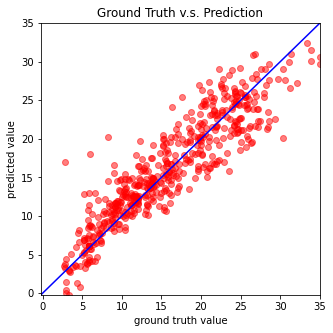

In [199]:
sandian(y_test1, pre_linear)

# 决策树CART

In [133]:
train = pd.read_csv("data_train.csv")
test = pd.read_csv("data_test.csv")

In [134]:
x_train2 = train[train.columns[0:17]]
y_train2 = train["tested_positive"]


x_test2 = test[test.columns[0:17]]
y_test2 = test["tested_positive"]

x_test2

,cli,ili,hh_cmnty_cli,nohh_cmnty_cli,wearing_mask,travel_outside_state,work_outside_home,shop,restaurant,spent_time,large_event,public_transit,anxious,depressed,felt_isolated,worried_become_ill,worried_finances
0,0.349894,0.303526,14.896138,11.042241,94.193418,13.451035,27.897832,52.781964,17.233422,36.244275,10.000024,2.519328,19.283756,12.624329,18.610074,67.254791,34.895563
1,0.400442,0.460616,16.179042,12.409392,86.899887,7.874857,29.052731,61.252793,23.115275,41.766911,11.709763,2.925490,15.176017,12.348354,18.869105,56.290905,39.795094
2,1.340178,1.358083,34.978851,28.765446,89.959077,8.100263,32.261689,58.655585,18.757496,34.135200,10.933759,1.851020,15.580819,10.283886,16.161903,63.231725,47.487560
3,1.451889,1.525751,43.746556,37.980202,92.830231,5.471431,36.272052,55.124505,14.897174,33.803561,6.876015,2.424112,21.673282,14.118495,23.854056,63.879268,45.454625
4,0.513454,0.532065,18.712837,14.862221,84.546220,6.813309,30.693302,63.703138,26.778119,41.441771,15.424754,2.874900,14.693772,11.056578,16.004496,58.569171,40.489063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,2.219857,2.175162,44.972532,37.509102,89.731292,11.729874,28.220867,49.821754,14.036801,32.663481,10.057731,1.314580,16.643820,12.661537,17.217590,69.909969,55.156124
536,0.419897,0.422491,13.396642,9.812187,90.976642,4.291530,28.444265,58.949768,17.129319,37.404996,8.452245,2.923079,16.979606,13.920511,21.238415,59.786265,41.738798
537,1.718651,1.757574,44.194894,38.507517,88.187659,10.430864,40.843916,53.897791,20.674771,40.292408,13.246917,1.866144,21.559400,13.435950,17.084220,63.513171,47.706119
538,0.410174,0.420547,13.283098,9.504699,94.276539,15.332580,31.145941,57.358606,17.838227,40.682777,7.715551,3.560307,18.888429,13.345168,17.879608,67.340857,39.215506


In [135]:
model_tree = tree.DecisionTreeClassifier(criterion = 'gini',
                                        random_state = 0,
                                        max_depth = 3)
model_tree.fit(x_train, y_train.astype('int'))

DecisionTreeClassifier(max_depth=3, random_state=0)

In [136]:
print(model_tree.feature_importances_)#特征重要性

[0.         0.         0.         0.52200105 0.30542379 0.
 0.         0.17257516 0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


In [137]:
pre_tree = model_tree.predict(x_test)
MSE_tree = mean_squared_error(y_test, pre_tree)
r2_tree = r2_score(y_test, pre_tree)
print(f"树的的MSE为：{MSE_tree}")
print(f"树的的R2为：{r2_tree}")

树的的MSE为：17.472534611160903
树的的R2为：0.6895433324316742


In [138]:
duibi = pd.read_csv('duibi.csv')
duibi

,Unnamed: 0,最小二乘线性回归,决策树CART
0,MSE,9.167065,17.472535
1,R2,0.837117,0.689543


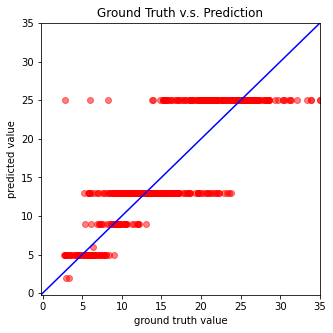

In [200]:
sandian(y_test2, pre_tree)

# 从上表可见最小二乘线性回归的 MSE较小而CART的较大，且R2接近于1，说明最小二乘线性回归的拟合性是要比决策树好

# 由于两个模型选择的所有数据都是共有的，所以没有哪个自变量特有一个模型

     [0.         0.         0.         0.52200105 0.30542379 0.
     0.         0.17257516 0.         0.         0.         0.
     0.         0.         0.         0.         0.        ]
# 结合树模型中的特征重要性结合数据源进行分析，可理解为
            "cli",
            "ili",
            "hh_cmnty_cli",
            "nohh_cmnty_cli",
            "wearing_mask",
            "travel_outside_state",
            "work_outside_home",
            "shop",
            "restaurant",
            "spent_time",
            "large_event",
            "public_transit",
            "anxious",
            "depressed",
            "felt_isolated",
            "worried_become_ill",
            "worried_finances"
# nohh_cmnty_cli、wearing_mask和shop这些变量对于covid确诊为阳性有着重要的影响，因为第一个变量为类似病例特点，而戴口罩和购物确实也对是否会成为阳性病例（感染）有着至关重要的影响 

# 组合预测


In [139]:
train = pd.read_csv("data_train.csv")
test = pd.read_csv("data_test.csv")

In [140]:
x_lineartrain = train[train.columns[5:17]]
y_lineartrain = train["tested_positive"]


x_lineartest = test[test.columns[5:17]]
y_lineartest = test["tested_positive"]

x_lineartrain

,travel_outside_state,work_outside_home,shop,restaurant,spent_time,large_event,public_transit,anxious,depressed,felt_isolated,worried_become_ill,worried_finances
0,8.855788,21.281945,47.920441,5.604750,34.973501,6.356075,2.002415,17.094717,13.400299,20.277023,70.563601,47.393675
1,7.769565,21.681374,52.229273,12.249501,36.601394,7.505977,1.447878,15.860734,10.986865,17.278508,69.134599,47.460475
2,12.730280,36.074534,54.378937,18.034296,39.107391,11.290916,1.538863,21.331017,14.441455,18.332524,63.548473,48.246483
3,7.641647,30.974863,52.192086,13.340358,35.260825,7.778403,1.856709,18.026892,13.039839,19.994407,66.496373,42.241658
4,7.569639,22.568825,46.224913,6.257657,26.404112,5.016519,1.714052,18.485258,13.799647,22.473818,71.228106,49.240134
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,13.159307,29.703089,55.694810,17.437332,37.101486,10.428325,2.616210,16.721539,11.708071,16.820223,62.632725,37.031516
2156,10.856500,39.505060,57.549337,23.736115,45.836244,17.735372,2.302091,15.511331,12.699177,16.065242,60.719634,40.026638
2157,11.298146,34.179540,57.358589,21.205778,43.016431,18.306046,1.421822,17.049483,16.178145,19.807840,58.487048,44.920096
2158,10.076551,32.768792,57.560150,18.433982,34.650649,11.184757,1.448209,15.088639,10.829878,15.679063,63.081314,47.470564


In [141]:
model_linear1 = LinearRegression()
model_linear1.fit(x_lineartrain, y_lineartrain)
print(f"回归截距为：{model.intercept_}")
print(f"回归系数为：{model.coef_}\n")
pre_linear1 = model_linear1.predict(x_lineartest)
MSE = mean_squared_error(y_lineartest, pre_linear1)
r2 = r2_score(y_lineartest, pre_linear1)
print(f"回归的MSE为：{MSE}")
print(f"回归的R2为：{r2}")

回归截距为：17.38599001587985
回归系数为：[-0.19334336  0.34314523 -0.84288048  0.27473411 -0.28698206  1.08498176
 -2.81753686  0.3450548  -1.41765884  0.88502967  0.17578669  0.48365701]

回归的MSE为：20.32873433549224
回归的R2为：0.6387936119097836


In [142]:
x_treetrain = train[train.columns[0:5]]
y_treetrain = train["tested_positive"]


x_treetest = test[test.columns[0:5]]
y_treetest = test["tested_positive"]

x_treetrain

,cli,ili,hh_cmnty_cli,nohh_cmnty_cli,wearing_mask
0,0.962107,1.009810,33.934510,28.635970,93.691094
1,1.068315,1.115356,31.253105,25.713572,93.366329
2,1.277818,1.329705,38.057987,32.426751,88.831245
3,1.259996,1.284557,39.118986,34.003818,90.135700
4,1.127301,1.162895,30.249241,24.286767,95.247184
...,...,...,...,...,...
2155,0.259221,0.293707,12.984799,8.896749,93.303076
2156,1.013754,1.055513,30.425863,25.600275,81.736145
2157,0.810842,0.863204,30.329653,25.904744,85.389893
2158,1.300772,1.364055,30.608099,24.085204,88.812336


In [173]:
model_tree1 = tree.DecisionTreeClassifier(criterion = 'gini',
                                        random_state = 0,
                                        max_depth = 3)
model_tree1.fit(x_treetrain, y_treetrain.astype('int'))

pre_tree1 = model_tree1.predict(x_treetest)
MSE_tree = mean_squared_error(y_treetest, pre_tree1)
r2_tree = r2_score(y_treetest, pre_tree1)
print(f"树的的MSE为：{MSE_tree}")
print(f"树的的R2为：{r2_tree}")

树的的MSE为：17.47587307893868
树的的R2为：0.6894840136434081


In [144]:
print(f"平均MSE为：{(MSE_tree+MSE)/2}")
print(f"平均R2为：{(r2_tree+r2)/2}")

平均MSE为：18.90230370721546
平均R2为：0.6641388127765958


# 不知是不是组合模型有问题，但是效果明显不好

In [145]:
outside_data = pd.read_csv("waibu.csv")

In [152]:
#用完全数据集的模型
pre_linear_out = model_linear.predict(outside_data)
pre_tree_out = model_tree.predict(outside_data)

MSE_linear_out = mean_squared_error(y_test, pre_linear_out)
r2_linear_out = r2_score(y_test, pre_linear_out)
print(f"外部数据回归的MSE为：{MSE_linear_out}")
print(f"外部数据回归的R2为：{r2_linear_out}")
MSE_tree_out = mean_squared_error(pre_tree, pre_tree_out)
r2_tree_out = r2_score(pre_tree, pre_tree_out)
print(f"外部数据树的MSE为：{MSE_tree_out}")
print(f"外部数据树的R2为：{r2_tree_out}")

ValueError: Found input variables with inconsistent numbers of samples: [540, 17]

# 课外自学方法：深度学习中一层DNN来进行预测

In [154]:
tr_path = 'covid.train.csv'  # 已处理好的分隔好的数据
tt_path = 'covid.test.csv'

In [155]:
myseed = 2020815  
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(myseed)
torch.manual_seed(myseed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(myseed)
#记录种子数，防止模型损毁后无法找到最初数据

In [156]:
def get_device():
    return 'cuda' if torch.cuda.is_available() else 'cpu'
#选择设备：CPU进行运算还是GPU

def plot_learning_curve(loss_record, title=''):
    #dev = development
    total_steps = len(loss_record['train'])
    x_1 = range(total_steps)
    x_2 = x_1[::len(loss_record['train']) // len(loss_record['dev'])]
    figure(figsize=(6, 4))
    plt.plot(x_1, loss_record['train'], c='tab:red', label='train')
    plt.plot(x_2, loss_record['dev'], c='tab:cyan', label='dev')
    plt.ylim(0.0, 5.)
    plt.xlabel('Training steps')
    plt.ylabel('MSE loss')
    plt.title('Learning curve of {}'.format(title))
    plt.legend()
    plt.show()
#绘制训练集和调参集的学习（LOSS）曲线图，使用除法向下取整

def plot_pred(dv_set, model, device, lim=35., preds=None, targets=None):
#记录整个DNN网络下每一个batch下的预测用来拟合曲线
    if preds is None or targets is None:
        model.eval()
        preds, targets = [], []
        for x, y in dv_set:
            x, y = x.to(device), y.to(device)
            with torch.no_grad():
                pred = model(x)
                preds.append(pred.detach().cpu())
                targets.append(y.detach().cpu())#.detach必须是no_grad无梯度要求
        preds = torch.cat(preds, dim=0).numpy()
        targets = torch.cat(targets, dim=0).numpy()

    figure(figsize=(5, 5))
    plt.scatter(targets, preds, c='r', alpha=0.5)
    plt.plot([-0.2, lim], [-0.2, lim], c='b')
    plt.xlim(-0.2, lim)
    plt.ylim(-0.2, lim)
    plt.xlabel('ground truth value')
    plt.ylabel('predicted value')
    plt.title('Ground Truth v.s. Prediction')
    plt.show()

In [157]:
#特征选择 从当前数据集中筛选出前5个最优特征项，用来进行训练
data = pd.read_csv('covid.train.csv')
x = data[data.columns[1:94]] #特征变量
y = data[data.columns[94]] #因变量（最后一日检测为阳性对象）
x = (x - x.min()) / (x.max() - x.min()) #极差标准化算法 防止出现0

bestfeatures = SelectKBest(score_func=f_regression, k=5) #特征选择器
#选择五个分数最高的feature
fit = bestfeatures.fit(x,y) #放入特征选择其中进行拟合
dfscores = pd.DataFrame(fit.scores_)#将当前分数作为数据集保存
dfcolumns = pd.DataFrame(x.columns)#列名数据

featureScores = pd.concat([dfcolumns,dfscores],axis=1)#链接矩阵 转制为列
featureScores.columns = ['Specs','Score']  #重新命名

print(featureScores.nlargest(15,'Score'))  #打印15个最好的变量

                 Specs          Score
75   tested_positive.1  148069.658278
57     tested_positive   69603.872591
42        hh_cmnty_cli    9235.492094
60      hh_cmnty_cli.1    9209.019558
78      hh_cmnty_cli.2    9097.375172
43      nohh_cmnty_cli    8395.421300
61    nohh_cmnty_cli.1    8343.255927
79    nohh_cmnty_cli.2    8208.176435
40                 cli    6388.906849
58               cli.1    6374.548000
76               cli.2    6250.008702
41                 ili    5998.922880
59               ili.1    5937.588576
77               ili.2    5796.947672
92  worried_finances.2     833.613191


In [160]:
class COVID19Dataset(Dataset):#对一整个数据进行取，筛选，转化tensor的功能封装
    def __init__(self,
                 path,
                 mode='train',
                 target_only=True):
        self.mode = mode #初始化参数（构造函数）

      
        with open(path, 'r') as fp:#读取数据集并进行处理
            data = list(csv.reader(fp))
            data = np.array(data[1:])[:, 1:].astype(float)#转化为np数组
        
        if not target_only:#如果不选择因变量
            feats = list(range(93))   #选择除因变量之前的所有feats
        else:#选择因变量就选择最优数据堆
            feats = [75, 57, 42, 60, 78, 43, 61, 79, 40, 58, 76, 41, 59, 77] #上面挑选的最优特征
        if mode == 'test':
            #如果需要读取测试集
            # data: 893 x 93 (40 周 + day 1 (18) + day 2 (18) + day 3 (17))
            data = data[:, feats]  #选取测试集
            self.data = torch.FloatTensor(data) #将np数据转化为Tensor
        else:
            # 训练集数据(train/dev sets)包括最后需要预测拟合的因变量
            # data: 2700 x 94 (40 states + day 1 (18) + day 2 (18) + day 3 (18))
            target = data[:, -1] #取最后一行为目标
            data = data[:, feats] #取特征优秀行
            
            # 在确定参数后，使用所有数据进行训练，即训练集=调参集
            if mode == 'train': #存储训练集合标签
                #indices = [i for i in range(len(data)) if i % 10 != 0]
                indices = [i for i in range(len(data))]
            elif mode == 'dev': #存储调参集合标签
                #indices = [i for i in range(len(data)) if i % 10 == 0]
                indices = [i for i in range(len(data))]
            
            self.data = torch.FloatTensor(data[indices])
            self.target = torch.FloatTensor(target[indices])#转化为tensor

        # 对州one-hot之后的特征进行标准化，如果不标准化，那么训练效果不会好
        self.data[:, 40:] = \
            (self.data[:, 40:] - self.data[:, 40:].mean(dim=0, keepdim=True)) \
            / self.data[:, 40:].std(dim=0, keepdim=True)
        #标准化data
        self.dim = self.data.shape[1]

        print('Finished reading the {} set of COVID19 Dataset ({} samples found, each dim = {})'
              .format(mode, len(self.data), self.dim))

    def __getitem__(self, index):
        #返回参数
        if self.mode in ['train', 'dev']:
            #从训练/调参集
            return self.data[index], self.target[index]
        else:
            #从测试集（没有因变量）
            return self.data[index]

    def __len__(self):
        #返回长度（防出错）
        return len(self.data)


In [161]:
#对选取好的dataset进行切分，分为每一个batch，然后放入torch的dataloader中
def prep_dataloader(path, mode, batch_size, n_jobs=0, target_only=False):
    dataset = COVID19Dataset(path, mode=mode, target_only=target_only)  # Construct dataset
    dataloader = DataLoader(
        dataset, batch_size,
        shuffle=(mode == 'train'), drop_last=False,#drop_last为True扔掉剩余不足以一个batch的数据
        num_workers=n_jobs, pin_memory=True)  #num_workers要用多少个进程  
    # Construct dataloader#pin_memory在cuda激活情况下每次dataloader返回前会存储在cuda内存
    return dataloader

In [162]:
#用torch设置一个简单FDN模型
class NeuralNet(nn.Module):
    def __init__(self, input_dim):#构造函数
        super(NeuralNet, self).__init__()
        self.net = nn.Sequential(#神经网络运行前的容器，按照顺序执行/单层网络
            nn.Linear(input_dim, 32),#对输入的数据压缩到32维（32个tensor）
            nn.BatchNorm1d(32),#使用BN，加速模型训练
            nn.Dropout(p=0.2),#使用Dropout技术，减小过拟合，注意不能在BN之前
            #Dropout按照p = 为百分比，每次随机取0一部分参数（随机化参数抽取技术）
            nn.LeakyReLU(),#激活层
            nn.Linear(32, 1),#压缩到1维方便输出
        )

        # MSEloss均方误差
        self.criterion = nn.MSELoss(reduction='mean')#reduction 需不需要缩减维度
        #self.criterion = nn.SmoothL1Loss(size_average=True)
        '''
        reduction 的技术说明:
    'none': no reduction will be applied.
    'mean': the sum of the output will be divided by the number of elements in the output.
    'sum': the output will be summed.
'''

    def forward(self, x):
        #输出output
        return self.net(x).squeeze(1)

    def cal_loss(self, pred, target):
        #原始数据和预测数据误差
        regularization_loss = 0
        for param in model.parameters():
        # 使用L2正则项
            # regularization_loss += torch.sum(abs(param))
            regularization_loss += torch.sum(param ** 2)
        return self.criterion(pred, target) + 0.00075 * regularization_loss
        #criterion为调用标准时也会附加一层参数
    

In [163]:
def train(tr_set, dv_set, model, config, device): #训练
    ''' DNN training '''

    n_epochs = config['n_epochs']  # 来限制最大epoch

    # 配置优化器
    optimizer = getattr(torch.optim, config['optimizer'])(
        model.parameters(), **config['optim_hparas'])
    #parameters 参数
    #getattr 直接从优化器中调取取数值
    min_mse = 1000.
    loss_record = {'train': [], 'dev': []} #记录训练集和调参集的loss
    early_stop_cnt = 0 #设置提前终止参数防止epoch过多
    epoch = 0
    while epoch < n_epochs:
        model.train()                           # 设置一个模型用来训练
        for x, y in tr_set:                     # 将其从dataloader中载入
            optimizer.zero_grad()               # 初始化梯度
            x, y = x.to(device), y.to(device)   # 将数据注入设备
            pred = model(x)                     # 正向传播 (compute output)
            #pred = 预测值
            mse_loss = model.cal_loss(pred, y)  # 计算当前mseloss
            mse_loss.backward()                 # 计算梯度(后向传播)
            optimizer.step()                    # 更新参数
            loss_record['train'].append(mse_loss.detach().cpu().item())
            #记录loss数据 .detach()把当前梯度单独抽离出来，不会影响训练
        # 每一个epoch之后将现在的模型放入调参集中进行检测
        dev_mse = dev(dv_set, model, device) #测试loss
        if dev_mse < min_mse:
            # 防止模型已经不进行梯度下降了，将其拿出保存
            min_mse = dev_mse
            print('Saving model (epoch = {:4d}, loss = {:.4f})'
                .format(epoch + 1, min_mse))
            torch.save(model.state_dict(), config['save_path'])  # Save model to specified path
            early_stop_cnt = 0 #提前终止
        else:
            early_stop_cnt += 1

        epoch += 1
        loss_record['dev'].append(dev_mse) #记录每一个epoch测试loss
        if early_stop_cnt > config['early_stop']:
            # 如果超过训练epoch上限，退出
            break

    print('Finished training after {} epochs'.format(epoch))
    return min_mse, loss_record

In [164]:
def dev(dv_set, model, device): #每一个epoch检测
    model.eval()                                # 把模型设置为eval形式
    total_loss = 0
    for x, y in dv_set:                         # 从dataloader中迭代抽取数据
        x, y = x.to(device), y.to(device)       # 注入运算设备(cpu/cuda)
        with torch.no_grad():                   # 不计算梯度
            pred = model(x)                     # 正向传播计算output(compute output)
            mse_loss = model.cal_loss(pred, y)  # 计算loss
        total_loss += mse_loss.detach().cpu().item() * len(x)  # 分离当前mesloss
    total_loss = total_loss / len(dv_set.dataset)             
    #计算平均loss
    return total_loss

In [165]:
def test(tt_set, model, device): #设置测试集
    model.eval()                                # 把模型设置为eval形式
    preds = []
    for x in tt_set:                            # 从dataloader中迭代抽取数据
        x = x.to(device)                        # 注入运算设备(cpu/cuda)
        with torch.no_grad():                   # 不计算梯度
            pred = model(x)                     # 正向传播计算output(compute output)
            preds.append(pred.detach().cpu())   # 记录预测数据
    preds = torch.cat(preds, dim=0).numpy()     # 将所有预测数值连接起来作为一个数组
    return preds

In [166]:
#设置初始化参数
device = get_device()
os.makedirs('models', exist_ok=True) #设置多个模型目录
target_only = True                   # 开启最优特征

config = {
    'n_epochs': 10000,                # 因为有early_stop，所以大一点没有影响
    'batch_size': 200,               # 微调batchsize
    'optimizer': 'Adam',              # 使用Adam优化器
    'optim_hparas': {                # 完全使用默认参数
        #'lr': 0.0001,                 
        #'momentum': 0.9,             
        #'weight_decay': 5e-4,
        #设置超参数
    },
    'early_stop': 500,               # 由于最后训练使用了所有数据，大一点影响不大
    'save_path': 'models/model.pth'  
}

In [167]:
#将数据装载到dataloader存储器中
tr_set = prep_dataloader(tr_path, 'train', config['batch_size'], target_only=target_only)
dv_set = prep_dataloader(tr_path, 'dev', config['batch_size'], target_only=target_only)
tt_set = prep_dataloader(tt_path, 'test', config['batch_size'], target_only=target_only)


model = NeuralNet(tr_set.dataset.dim).to(device)

Finished reading the train set of COVID19 Dataset (2700 samples found, each dim = 14)
Finished reading the dev set of COVID19 Dataset (2700 samples found, each dim = 14)
Finished reading the test set of COVID19 Dataset (893 samples found, each dim = 14)


In [168]:
model_loss, model_loss_record = train(tr_set, dv_set, model, config, device)

Saving model (epoch =    1, loss = 322.2637)
Saving model (epoch =    2, loss = 308.0977)
Saving model (epoch =    3, loss = 275.9879)
Saving model (epoch =    4, loss = 242.6145)
Saving model (epoch =    7, loss = 242.2349)
Saving model (epoch =    8, loss = 235.9607)
Saving model (epoch =    9, loss = 229.4331)
Saving model (epoch =   10, loss = 200.6809)
Saving model (epoch =   11, loss = 194.9359)
Saving model (epoch =   12, loss = 193.0382)
Saving model (epoch =   13, loss = 181.5212)
Saving model (epoch =   14, loss = 145.6002)
Saving model (epoch =   15, loss = 141.3887)
Saving model (epoch =   16, loss = 111.2770)
Saving model (epoch =   19, loss = 108.7157)
Saving model (epoch =   20, loss = 99.5421)
Saving model (epoch =   21, loss = 78.5999)
Saving model (epoch =   24, loss = 77.8935)
Saving model (epoch =   25, loss = 71.7660)
Saving model (epoch =   26, loss = 61.6367)
Saving model (epoch =   30, loss = 55.9222)
Saving model (epoch =   31, loss = 33.9821)
Saving model (epo

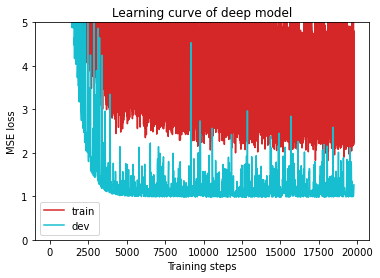

In [171]:
plot_learning_curve(model_loss_record, title='deep model')
#可视化训练数据和每个epoch调参数据

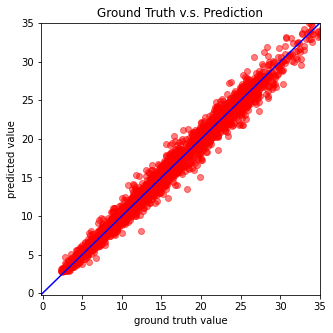

In [176]:
del model
model = NeuralNet(tr_set.dataset.dim).to(device)
ckpt = torch.load(config['save_path'], map_location='cpu')  # 载入最优模型
model.load_state_dict(ckpt)
plot_pred(dv_set, model, device)  # 调参集的预测数据


In [194]:
dev_perd1 = dev(dv_set, model, device)
dev_perd1
# dev_perd = pd.DataFrame(dev_perd1)
# dev_shuju = pd.read_csv('covid.train.csv')
# dev_target = dev_shuju[:-1]
# r2_DNN = r2_score(dev_target, dev_perd)
# print(f"树的的R2为：{r2_DNN}")

0.9772749234128881

# 使用深度学习最简单的一层DNN模型的MSE最终能够降低到1左右